# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)
train_x, train_y = train_data.drop(columns=["Class"]), train_data["Class"]
test_x, test_y = test_data.drop(columns=["Class"]), test_data["Class"]

In [5]:
train_x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,...,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000
mean,-0.016403,0.048923,-0.043973,0.034331,-0.036712,-0.003158,-0.045252,0.004454,-0.015110,-0.036969,...,0.003592,0.000963,0.010426,-0.000790,-0.004244,0.002347,-0.007427,-0.000141,0.001258,0.003722
std,2.042883,1.621963,1.767744,1.479383,1.503646,1.338278,1.493003,1.372115,1.135345,1.264627,...,0.826847,0.734724,0.859490,0.740864,0.618644,0.603681,0.519103,0.482593,0.405880,0.310502
min,-29.942972,-42.172688,-30.558697,-5.024097,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-1.599258,-7.418878,-9.617915
25%,-0.910863,-0.573509,-0.886741,-0.838088,-0.711829,-0.763609,-0.565292,-0.205873,-0.658660,-0.539625,...,-0.455954,-0.210464,-0.227237,-0.539967,-0.157923,-0.352404,-0.324914,-0.325960,-0.070012,-0.051909
50%,0.019301,0.077345,0.186036,-0.012816,-0.062167,-0.267090,0.041134,0.021334,-0.051571,-0.091074,...,-0.003263,-0.064145,-0.029281,0.008553,-0.011225,0.041589,0.012478,-0.056710,0.002595,0.011210
75%,1.316872,0.807992,1.034736,0.766306,0.611459,0.395565,0.562450,0.327333,0.611845,0.460815,...,0.460565,0.131491,0.184815,0.524420,0.148123,0.438576,0.349021,0.236812,0.094230,0.081293
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,19.587773,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


## Data preprocessing
- 데이터 분포 확인

## 데이터 분포 확인

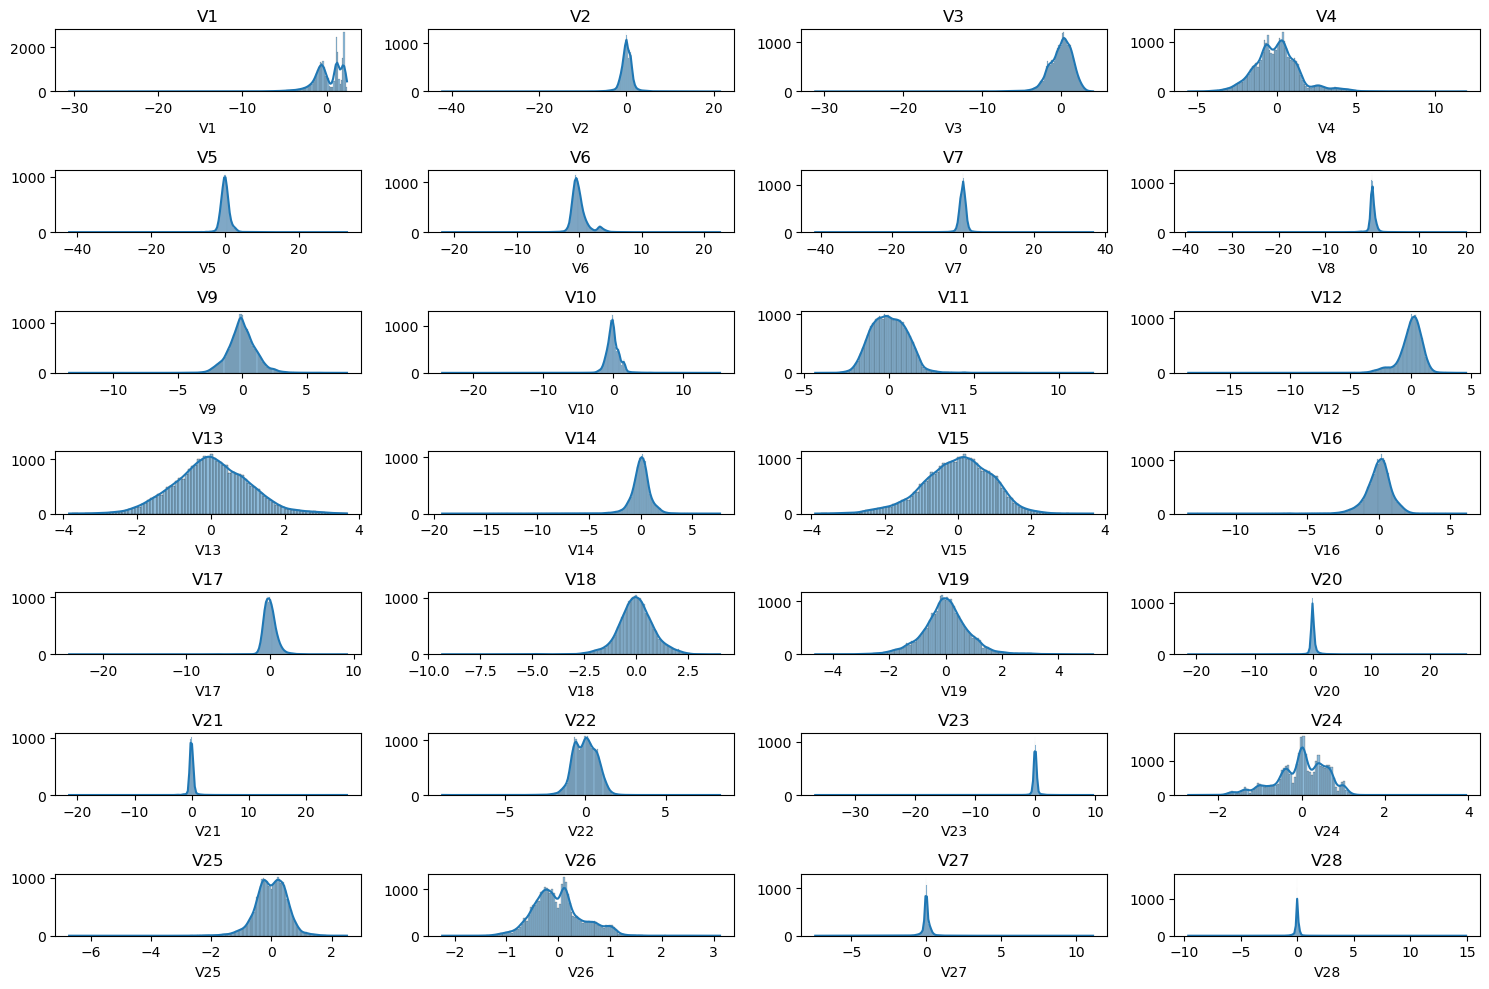

In [6]:
fig, axes = plt.subplots(7, 4, figsize=(15, 10))
for i, column in enumerate(train_x.columns):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_ylabel("")
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

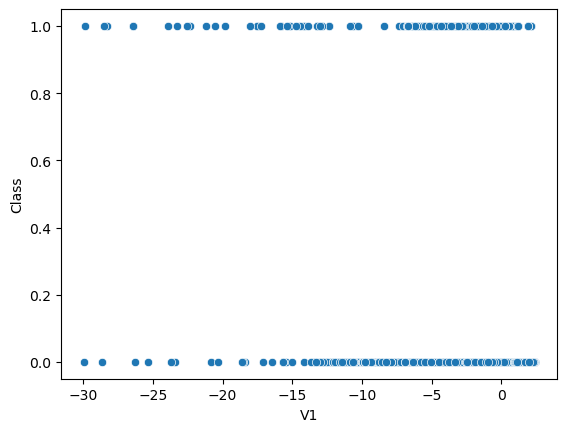

In [7]:
sns.scatterplot(data=train_data, x="V1", y="Class")
plt.show()

Feature별로 평균과 표준편차 등이 모두 다릅니다. 값이 다른 feature에 비해 큰 feature가 의도치 않게 모델에 큰 영향을 미칠 수 있으므로, standardization합니다.

In [8]:
standard_scaler = StandardScaler()

train_x = pd.DataFrame(standard_scaler.fit_transform(train_x), columns=train_x.columns)
test_x = pd.DataFrame(standard_scaler.transform(test_x), columns=test_x.columns)

In [9]:
train_x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,...,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04,2.007400e+04
mean,-2.088374e-17,-1.557432e-17,-2.477732e-18,3.893579e-18,3.539617e-19,-1.415847e-18,6.194330e-18,1.769809e-18,-2.194563e-17,-1.805205e-17,...,-7.433196e-18,-9.379985e-18,-3.008675e-18,-6.371311e-18,-1.044187e-17,2.442336e-17,6.017349e-18,7.079234e-18,-1.415847e-18,-9.203004e-18
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.464955e+01,-2.603183e+01,-1.726239e+01,-3.419367e+00,-2.800676e+01,-1.638427e+01,-2.777127e+01,-2.862209e+01,-1.181957e+01,-1.926800e+01,...,-5.590808e+00,-2.911109e+01,-2.497377e+01,-1.199471e+01,-5.926291e+01,-4.506418e+00,-1.291721e+01,-3.313679e+00,-1.828206e+01,-3.098812e+01
25%,-4.378531e-01,-3.837619e-01,-4.767595e-01,-5.897333e-01,-4.489978e-01,-5.682457e-01,-3.483274e-01,-1.532902e-01,-5.668457e-01,-3.974834e-01,...,-5.557947e-01,-2.877720e-01,-2.765236e-01,-7.277858e-01,-2.484196e-01,-5.876618e-01,-6.116223e-01,-6.751600e-01,-1.755989e-01,-1.791696e-01
50%,1.747757e-02,1.752328e-02,1.301177e-01,-3.187024e-02,-1.692895e-02,-1.972227e-01,5.786199e-02,1.230277e-02,-3.211471e-02,-4.278435e-02,...,-8.290536e-03,-8.861887e-02,-4.619969e-02,1.261130e-02,-1.128562e-02,6.500659e-02,3.834715e-02,-1.172209e-01,3.294778e-03,2.411879e-02
75%,6.526599e-01,4.680056e-01,6.102332e-01,4.947957e-01,4.310774e-01,2.979450e-01,4.070430e-01,2.353205e-01,5.522297e-01,3.936313e-01,...,5.526842e-01,1.776594e-01,2.029034e-01,7.089337e-01,2.462978e-01,7.226337e-01,6.866790e-01,4.910133e-01,2.290692e-01,2.498318e-01
max,1.182616e+00,1.320549e+01,2.327226e+00,8.039483e+00,2.191274e+01,1.683733e+01,2.459703e+01,1.427271e+01,7.159468e+00,1.207738e+01,...,6.319043e+00,3.571012e+01,3.163864e+01,1.128815e+01,1.558516e+01,6.536255e+00,4.850466e+00,6.471226e+00,2.743364e+01,4.806982e+01


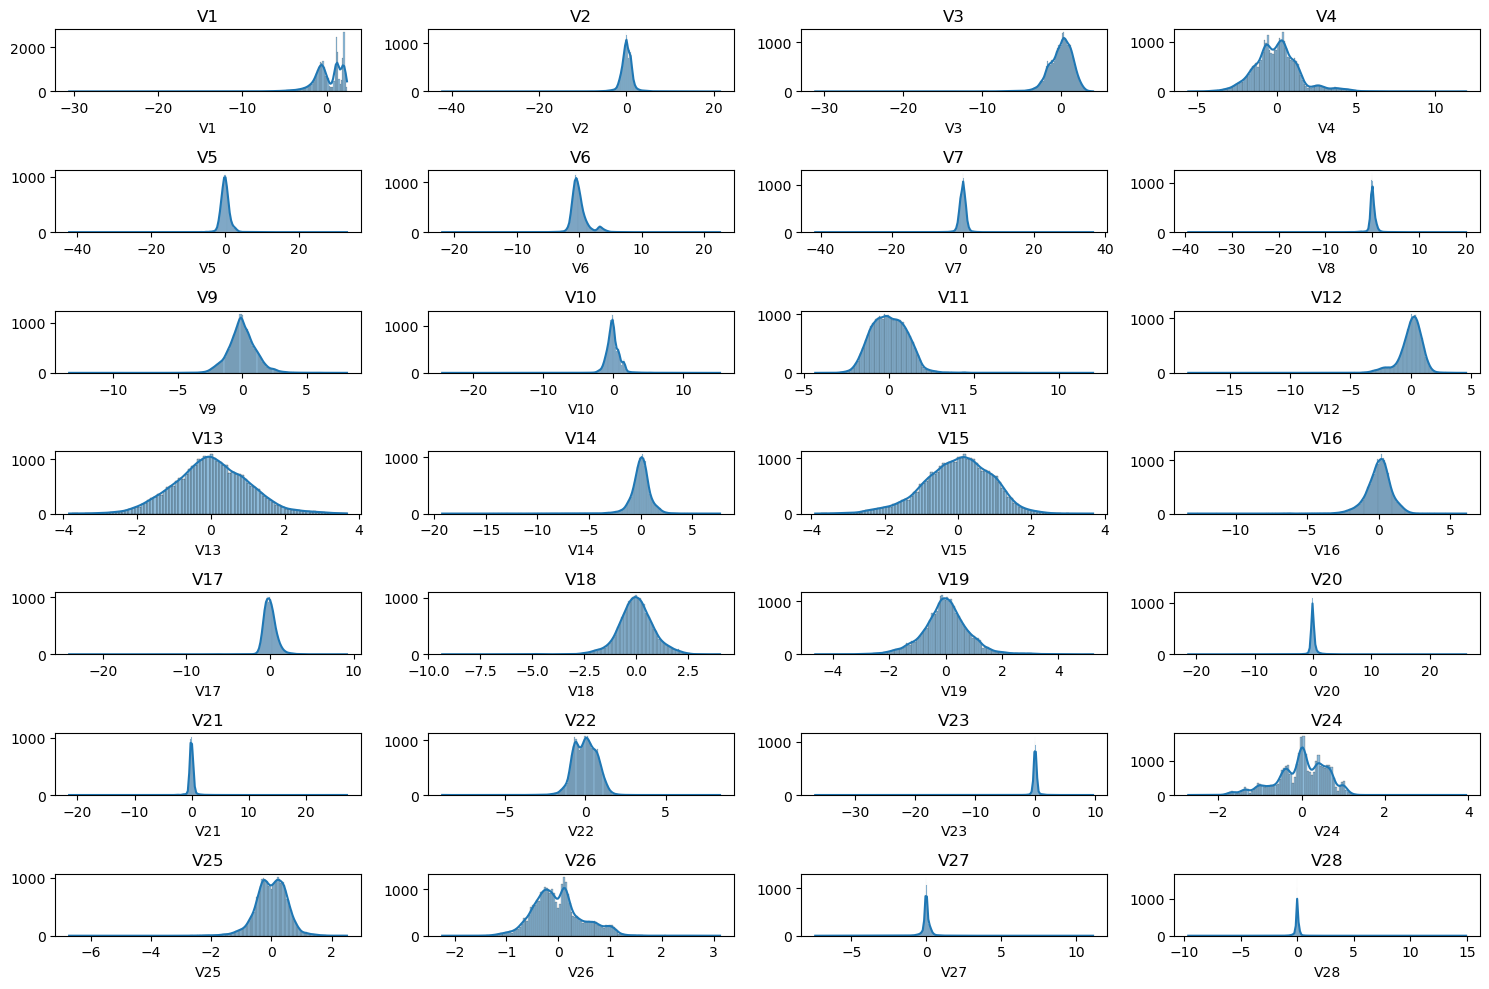

In [10]:
fig, axes = plt.subplots(7, 4, figsize=(15, 10))
for i, column in enumerate(train_x):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_ylabel("")
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()

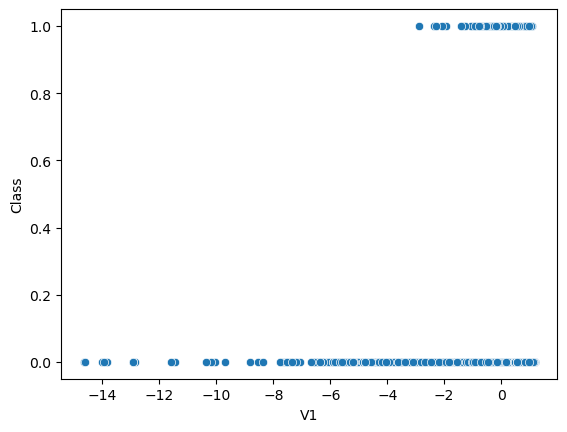

In [11]:
sns.scatterplot(data=train_x, x="V1", y=train_y)
plt.show()

`V1`의 scale이 달라졌음을 확인할 수 있습니다.

In [12]:
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [13]:
pred_y = model.predict(test_x)

## 모델 성능 평가
아래 지표들을 활용하여 모델의 성능을 평가합니다.
- Accuracy: 예측 결과가 실제와 일치하는 정도
- Confusion matrix:
  - TP(True Positive): positive로 예측했고, 실제로도 positive인 경우
  - FN(False Negative): negative로 예측했는데, 실제로는 positive인 경우
  - FP(False Positive): positive로 예측했는데, 실제로는 negative인 경우
  - TN(True Negative): negative로 예측했고, 실제로도 negative인 경우
- Precision: $\frac{TP}{TP+FP}$ (모델이 positive로 분류한 것 중 실제로 positive는 어느 정도인지)
- Recall: $\frac{TP}{TP+FN}$ (실제 positive인 것을 모델이 얼마나 잘 찾아냈는지)
- F1-score: precision과 recall의 조화평균
- ROC curve: 임계값을 조절하는 경우의 성능(TPR(True Positive Rate), FPR(False Positive Rate)) 변화
- AUC: ROC curve 아래 영역

In [14]:
acc = accuracy_score(test_y, pred_y)
conf_matrix = confusion_matrix(test_y, pred_y, normalize="true")
cls_report = classification_report(test_y, pred_y)

print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Classification report:\n{cls_report}")

Accuracy: 0.9980241748024175
Confusion matrix:
[[9.99531067e-01 4.68933177e-04]
 [1.75675676e-01 8.24324324e-01]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.94      0.82      0.88        74

    accuracy                           1.00      8604
   macro avg       0.97      0.91      0.94      8604
weighted avg       1.00      1.00      1.00      8604



Label이 0일 때보다 1일 때 예측을 어려워하는 것을 알 수 있습니다.

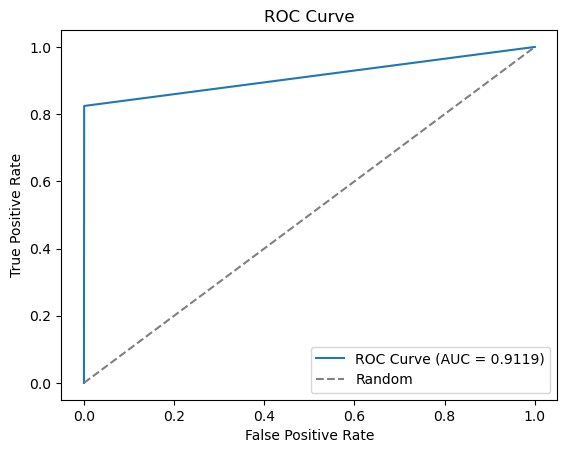

In [15]:
# Predicted label을 고려하여 ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

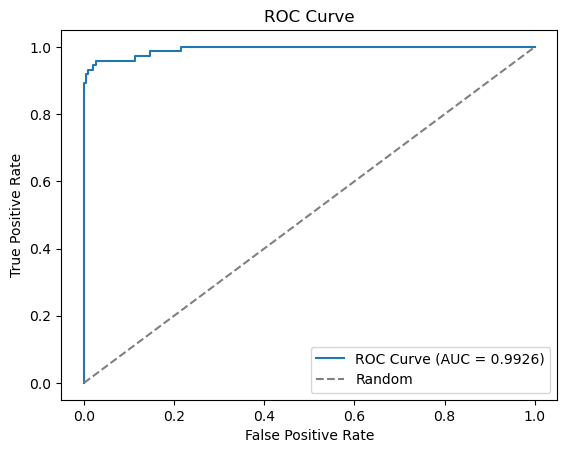

In [16]:
# Positive로 판별할 확률을 고려하여 ROC Curve 그리기
prob_y = model.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, prob_y)
auc = roc_auc_score(test_y, prob_y)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 성능 개선
- Data imbalance 확인
- Recall 개선 시도

### Data imbalance 확인
앞서 label이 0일 때보다 1일 때 모델이 예측을 어려워하는 것을 확인했습니다. \
Data imbalance 문제가 있진 않은지 확인합니다.

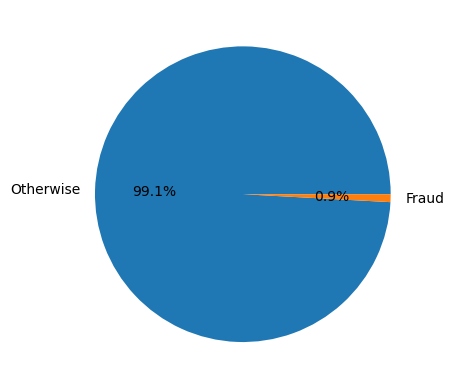

In [17]:
train_y_zeros, train_y_ones = train_y.value_counts()
plt.pie(x=(train_y_zeros, train_y_ones), labels=("Otherwise", "Fraud"), autopct='%1.1f%%')
plt.show()

Data imbalance가 매우 심합니다. \
이러한 경우 극단적으로 모델이 모든 경우를 Otherwise(0)으로 예측한다고 해도 성능이 좋게 측정될 수 있습니다.

### Recall 개선 시도
앞서 confusion matrix에서 recall은 0.82로, precision에 비해 많이 낮음을 확인했습니다. \
특히 풀고자 하는 문제가 사기 탐지인만큼, 실제 사기를 얼마나 탐지했는지가 중요하게 작용할 것으로 판단됩니다. \
Threshold 조정을 통해 trade-off를 감수하고, recall 수치를 높여보고자 합니다.

In [18]:
prob_y = model.predict_proba(test_x)[:, 1]

threshold = 0.25
pred_y = (prob_y >= threshold).astype(int)

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.93      0.86      0.90        74

    accuracy                           1.00      8604
   macro avg       0.96      0.93      0.95      8604
weighted avg       1.00      1.00      1.00      8604

